# Linear Element for Poisson Equation in 3D

This example is to show the rate of convergence of the linear finite element approximation of the Poisson equation on the unit cube:

$$- \Delta u = f \; \hbox{in } (0,1)^3$$

for the following boundary conditions
- Non-empty Dirichlet boundary condition: $u=g_D \hbox{ on }\Gamma_D, \nabla u\cdot n=g_N \hbox{ on }\Gamma_N.$
- Pure Neumann boundary condition: $\nabla u\cdot n=g_N \hbox{ on } \partial \Omega$.
- Robin boundary condition: $g_R u + \nabla u\cdot n=g_N \hbox{ on }\partial \Omega$.

**References**:
- [Quick Introduction to Finite Element Methods](femdoc.html)
- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

**Subroutines**:

    - Poisson3
    - cubePoisson
    - femPoisson3
    - Poisson3femrate
    
The method is implemented in `Poisson3` subroutine and tested in `cubePoisson`. Together with other elements (P1, P2,Q1,WG), `femPoisson3` provides a concise interface to solve Poisson equation. The P1 element is tested in `Poisson3femrate`. This doc is based on `Poisson3femrate`.    

## P1 Linear Element

For the linear element on a simplex, the local basis functions are barycentric coordinate of vertices. The local to global pointer is `elem`. This is the simplest and default element for elliptic equations.

**A local basis of P1**

For $i = 1, 2, 3,4$, a local basis of the linear element space is given by the barycentric coordinate

$$\phi_i = \lambda_i, \quad \nabla \phi_i = \nabla \lambda_i = - \frac{1}{6|T|}\boldsymbol n_i$$

where $\boldsymbol n_i$ is the scaled (not unit) outwards normal direction with length $|\boldsymbol n_i| = 2|F_i|$, with $F_i$ being the face opposite to the i-th vertex. The gradient can be computed by

    [Dlambda,volume]= gradbasis3(node,elem);

See [Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf) Section 2.1 for geometric explanation of the barycentric coordinate and [Programming of Finite Element Methods in MATLAB](http://www.math.uci.edu/~chenlong/226/Ch3FEMcode.pdf) for detailed explanation. For P1 element, the basic data structure `node,elem` is sufficient and displayed for the following coarse mesh.

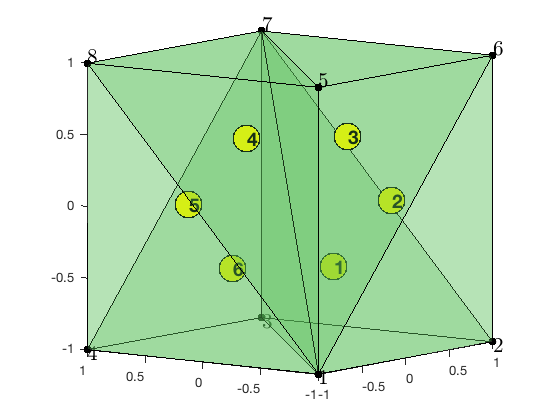

In [1]:
node = [-1,-1,-1; 1,-1,-1; 1,1,-1; -1,1,-1; -1,-1,1; 1,-1,1; 1,1,1; -1,1,1]; 
elem = [1,2,3,7; 1,6,2,7; 1,5,6,7; 1,8,5,7; 1,4,8,7; 1,3,4,7];
clf; showmesh3(node,elem,[],'FaceAlpha',0.25);
view([-53,8]);
axis on
findelem3(node,elem);
findnode3(node);

In [2]:
disp(elem);

     1     2     3     7
     1     6     2     7
     1     5     6     7
     1     8     5     7
     1     4     8     7
     1     3     4     7



Unlike 2-D case, to apply uniform refinement to obtain a fine mesh with good mesh quality, a different ordering of the inital mesh, which may violate the positive ordering, should be used. See [3 D Red Refinement](uniformrefine3doc.html).

## Mixed boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4913,  #nnz:    23790, smoothing: (1,1), iter: 11,   err = 3.72e-09,   time = 0.14 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    35937,  #nnz:   209374, smoothing: (1,1), iter: 11,   err = 5.13e-09,   time = 0.24 s
Table: Error
 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  125   2.500e-01   6.46061e-02   9.23927e-01   1.17911e-01   6.04325e-02
  729   1.250e-01   1.86268e-02   4.80477e-01   3.91991e-02   1.95770e-02
 4913   6.250e-02   4.86895e-03   2.42898e-01   1.06348e-02   5.17072e-03
35937   3.125e-02   1.23196e-03   1.21798e-01   2.72075e-03   1.31609e-03

Table: CPU time
 #Dof   Assemble     Solve      Error      Mesh    

  125   1.09e-01   1.88e-02   6.00e-02   2.00e-02
  729   4.94e-02   9.26e-04   3.00e-02   5.00e-02
 4913   1.40e-01   1.41e-01   1.00e-01   1.00e-01
35937   1.45e+00   2.39e-01   8.50e-01   8.60e-01



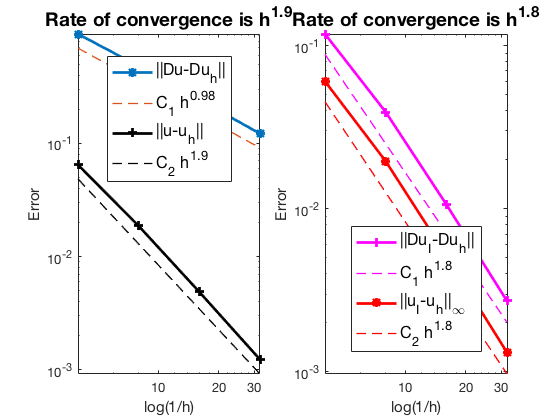

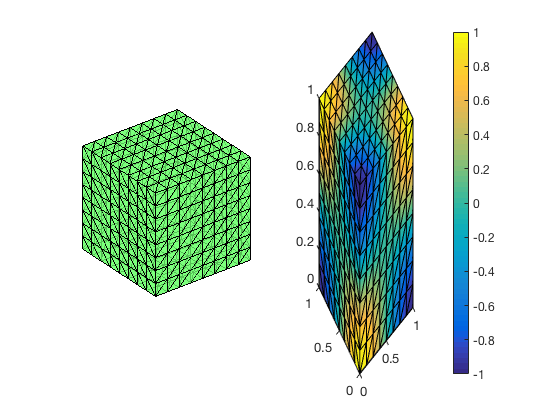

In [3]:
%% Setting
[node,elem] = cubemesh([0,1,0,1,0,1],0.5); 
mesh = struct('node',node,'elem',elem);
option.L0 = 1;
option.maxIt = 4;
option.elemType = 'P1';
option.printlevel = 1;
option.plotflag = 1;

%% Non-empty Dirichlet boundary condition.
pde = sincosdata3;
mesh.bdFlag = setboundary3(node,elem,'Dirichlet','~(x==0)','Neumann','x==0');
femPoisson3(mesh,pde,option);

## Pure Neumann boundary condition

When pure Neumann boundary condition is posed, i.e., $-\Delta u =f$ in $\Omega$ and $\nabla u\cdot n=g_N$ on $\partial \Omega$, the data should be consisitent in the sense that $\int_{\Omega} f \, dx + \int_{\partial \Omega} g \, ds = 0$. The solution is unique up to a constant. A post-process is applied such that the constraint $\int_{\Omega}u_h dx = 0$ is imposed. 

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4913,  #nnz:    32650, smoothing: (1,1), iter: 13,   err = 2.43e-09,   time = 0.076 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    35937,  #nnz:   245018, smoothing: (1,1), iter: 14,   err = 4.76e-09,   time = 0.24 s
Table: Error
 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  125   2.500e-01   7.70680e-02   8.69504e-01   3.38890e-01   1.33687e-01
  729   1.250e-01   2.35461e-02   4.70688e-01   1.05354e-01   4.13393e-02
 4913   6.250e-02   6.27721e-03   2.41377e-01   3.23192e-02   1.41357e-02
35937   3.125e-02   1.59840e-03   1.21576e-01   9.72436e-03   5.74640e-03

Table: CPU time
 #Dof   Assemble     Solve      Error      Mesh    

  125   3.73e-02   1.12e-03   1.00e-02   0.00e+00
  729   1.32e-02   1.28e-02   1.00e-02   1.00e-02
 4913   9.45e-02   7.62e-02   7.00e-02   1.00e-01
35937   1.47e+00   2.41e-01   8.40e-01   8.60e-01



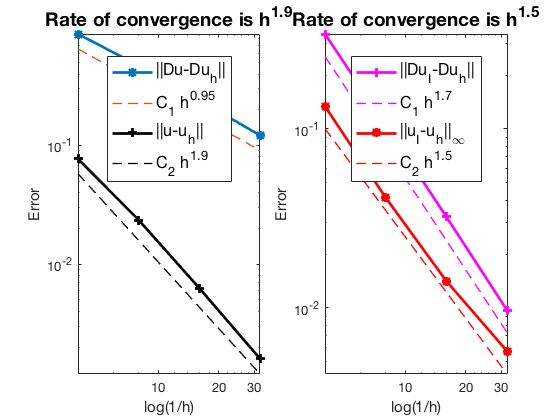

In [4]:
%% Pure Neumann boundary condition.
option.plotflag = 0;
mesh.bdFlag = setboundary3(node,elem,'Neumann');
femPoisson3(mesh,pde,option);

## Robin boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4913,  #nnz:    35729, smoothing: (1,1), iter: 11,   err = 2.75e-09,   time = 0.067 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    35937,  #nnz:   257313, smoothing: (1,1), iter: 11,   err = 8.49e-09,   time = 0.18 s
Table: Error
 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  125   2.500e-01   6.40633e-02   8.75746e-01   2.90399e-01   1.03297e-01
  729   1.250e-01   1.93507e-02   4.71714e-01   9.10331e-02   4.09455e-02
 4913   6.250e-02   5.14258e-03   2.41519e-01   2.57055e-02   1.83236e-02
35937   3.125e-02   1.30834e-03   1.21594e-01   6.98457e-03   6.58871e-03

Table: CPU time
 #Dof   Assemble     Solve      Error      Mesh    

  125   5.16e-02   3.37e-04   0.00e+00   0.00e+00
  729   2.22e-02   3.12e-03   2.00e-02   1.00e-02
 4913   1.06e-01   6.72e-02   8.00e-02   7.00e-02
35937   1.18e+00   1.83e-01   8.60e-01   8.00e-01



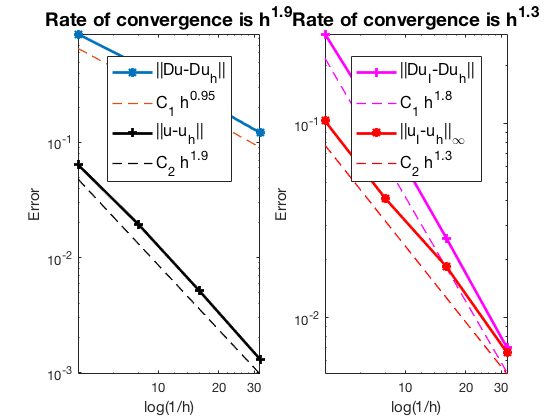

In [5]:
%% Pure Robin boundary condition.
pde = sincosRobindata3;
mesh.bdFlag = setboundary3(node,elem,'Robin');
femPoisson3(mesh,pde,option);

## Conclusion

The optimal rate of convergence of the H1-norm (1st order) and L2-norm
(2nd order) is observed. The 2nd order convergent rate between two
discrete functions $\|\nabla (u_I - u_h)\|$ is known as superconvergence.

MGCG converges uniformly in all cases.

Note that for Robin boundary condition, the order of the error in the
maximum norm is not close to 2. Need to double check the code.